In [1]:
#With a suitable example demonstrate the perceptron learning law with its decision regions using python. Give the output in graphical form.

In [2]:
!pip install numpy matplotlib scikit-learn

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Load the Iris dataset (including Lily dataset)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Consider only the first two features for simplicity
y = (iris.target != 0) * 1  # Convert classes to binary (1 for Iris-versicolor, 0 for Iris-setosa)

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create a perceptron model
perceptron = Perceptron(max_iter=100, eta0=0.1, random_state=42)

In [7]:
# Train the perceptron on the training data
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=42)

In [8]:
# Make predictions on the test data
y_pred = perceptron.predict(X_test)

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.78%


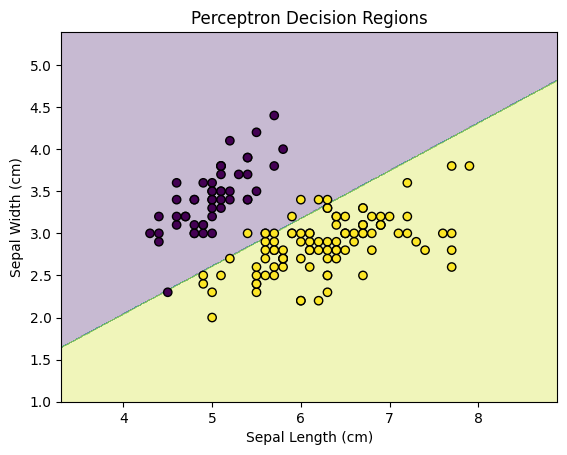

In [10]:
# Plot decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')
plt.title('Perceptron Decision Regions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()